In [1]:
#%pylab inline
%matplotlib inline
print __doc__

import copy
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#plt.rcParams['pdf.fonttype'] = 42
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
import pyart




Automatically created module for IPython interactive environment


In [2]:
#file="/home/sofia/Documents/Pyart/Radar_Parana/data/20141216/cf/20141216/cfrad.20141216_082431.000_to_20141216_082729.000_INTA_Par_v1_SUR.nc" 
#file="/home/sofia/Documents/Pyart/Radar_Parana/data/20141216/cf/20141216/cfrad.20141216_192434.000_to_20141216_192730.556_INTA_Par_v1_SUR.nc"
#file="/home/sofia/Documents/Pyart/Radar_Parana/data/20141226/cf/20141226/cfrad.20141226_192434.000_to_20141226_192731.001_INTA_Par_v1_SUR.nc"
#file="/home/sofia/Documents/Pyart/Radar_Parana/data/20141226/cf/20141226/cfrad.20141226_195433.000_to_20141226_195730.000_INTA_Par_v1_SUR.nc"
#file="/home/sofia/Documents/Pyart/Radar_Parana/data/20141226/cf/20141226/cfrad.20141226_201436.000_to_20141226_201734.000_INTA_Par_v1_SUR.nc"
file= "/home/sofia/Documents/Pyart/Radar_Parana/data/20141004/cf/20141004/cfrad.20141004_194432.000_to_20141004_194729.389_INTA_Par_v1_SUR.nc"


radar = pyart.io.read_cfradial(file)

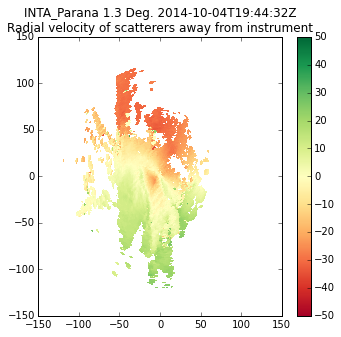

In [24]:
#graficamos primero los datos

xlims=[-150,150]
ylims=[-150,150]

tilt=1


# create a plot of the various differential phase fields
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(12, 5))

#ax5 = fig.add_subplot(121)
#display.plot_ppi('dBZ', tilt, ax=ax5,
 #                colorbar_label='',
  #               axislabels_flag=False,vmin=-25,vmax=70)
#display.set_limits(xlims,ylims)


ax6 = fig.add_subplot(122)
display.plot_ppi('V', tilt, ax=ax6,
                 colorbar_label='',cmap='RdYlGn',
                 axislabels_flag=False,vmin=-50,vmax=50)
display.set_limits(xlims,ylims)


#plt.savefig(radar.time['units'][14:]+"_"+"el"+np.str(radar.elevation['data'][tilt])+".png",dpi=150)

plt.show()

In [3]:

radar.fields['corr_vel']=radar.fields['V']



In [4]:
#corremos algoritmo dealising
radar.fields['corr_vel']=pyart.correct.dealias_region_based(radar,interval_splits=3, 
                                            interval_limits=None, skip_between_rays=2, skip_along_ray=2, centered=True, 
                                            nyquist_vel=39., gatefilter=None, rays_wrap_around=None, keep_original=True, 
                                            vel_field="V", corr_vel_field=None)

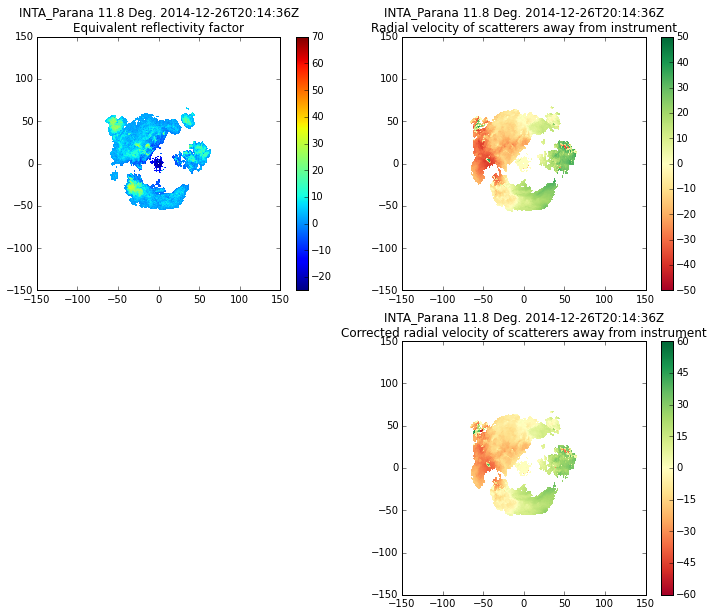

In [66]:
#Graficamos los datos corregidos

xlims=[-150,150]
ylims=[-150,150]

tilt=5

display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(12, 10))

ax5 = fig.add_subplot(221)
display.plot_ppi('dBZ', tilt, ax=ax5,
                 colorbar_label='',
                 axislabels_flag=False,vmin=-25,vmax=70)
display.set_limits(xlims,ylims)

ax6 = fig.add_subplot(222)
display.plot_ppi('V', tilt, ax=ax6,
                 colorbar_label='',cmap='RdYlGn',
                 axislabels_flag=False,vmin=-50,vmax=50)
display.set_limits(xlims,ylims)

ax6 = fig.add_subplot(224)
display.plot_ppi('corr_vel', tilt, ax=ax6,
                 colorbar_label='',cmap='RdYlGn',
                 axislabels_flag=False,vmin=-60,vmax=60)
display.set_limits(xlims,ylims)


#plt.savefig(radar.time['units'][14:]+"_"+"el"+np.str(radar.elevation['data'][tilt])+"_corr.png",dpi=150)
plt.show()

